In [1]:
# Create your first MLP in Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
np.random.seed(1)

In [3]:
dataset = np.loadtxt("train_en.txt")
# split into input (X) and output (Y) variables
X = dataset[:,0:300]
Y = dataset[:,300]
Y = keras.utils.to_categorical(Y, num_classes=13)

test_data = np.loadtxt("test_en.txt")
X_test = test_data[:,0:300]
Y_test = test_data[:,300]
Y_test = keras.utils.to_categorical(Y_test, num_classes=13)

In [4]:
X = np.expand_dims(X, axis=2) # reshape (569, 30) to (569, 30, 1) 
X_test = np.expand_dims(X_test, axis=2) 

In [5]:
# # create model
model = Sequential()
model.add(Conv1D(32, 11, padding='valid', activation='softmax', strides=1, input_shape=(300, 1) ))
model.add(Conv1D(32, 3, padding='valid', activation='softmax', strides=1) )
model.add(MaxPooling1D())

model.add(Conv1D(64, 3, padding='valid', activation='softmax', strides=1) )
model.add(Conv1D(64, 3, padding='valid', activation='softmax', strides=1) )
model.add(MaxPooling1D())


model.add(Flatten())
model.add(Dense(200, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 290, 32)           384       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 288, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 144, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 142, 64)           6208      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 140, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 70, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4480)              0         
__________

In [7]:
# Fit the model 1
history = model.fit(X, Y, epochs=40, batch_size=10,
          validation_data=(X_test, Y_test))
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 31933 samples, validate on 7773 samples
Epoch 1/40
31933/31933 [==============================] - 71s - loss: 2.1915 - acc: 0.2134 - val_loss: 2.1266 - val_acc: 0.2187
Epoch 2/40
31933/31933 [==============================] - 70s - loss: 2.1659 - acc: 0.2139 - val_loss: 2.1229 - val_acc: 0.2241
Epoch 3/40
31933/31933 [==============================] - 71s - loss: 2.1623 - acc: 0.2162 - val_loss: 2.1162 - val_acc: 0.2190
Epoch 4/40
31933/31933 [==============================] - 71s - loss: 2.1608 - acc: 0.2104 - val_loss: 2.1175 - val_acc: 0.2187
Epoch 5/40
31933/31933 [==============================] - 71s - loss: 2.1588 - acc: 0.2125 - val_loss: 2.1179 - val_acc: 0.2199
Epoch 6/40
31933/31933 [==============================] - 70s - loss: 2.1577 - acc: 0.2138 - val_loss: 2.1170 - val_acc: 0.2438
Epoch 7/40
31933/31933 [==============================] - 70s - loss: 2.1565 - acc: 0.2162 - val_loss: 2.1157 - val_acc: 0.2187
Epoch 8/40
31933/31933 [==============================]

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])


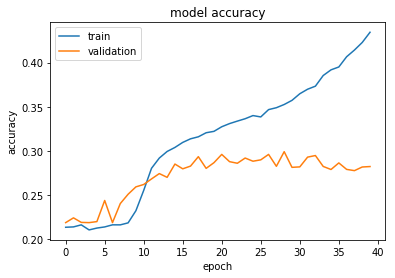

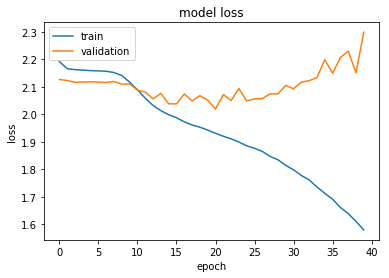

In [8]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()